In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

plt.style.use('ggplot')

In [116]:
data = pd.read_excel("data.xlsx", sheet_name="B - bodyfat")
pd.set_option("display.precision", 3)

In [117]:
data

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17,B18
0,1.071,12.3,normal,23,Male,Somerville,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.085,6.1,low,22,Male,Somerville,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.041,25.3,high,22,Male,Somerville,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.075,10.4,normal,26,Male,Somerville,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.034,28.7,high,24,Male,Somerville,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.074,11.0,normal,70,Male,Revere,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.024,33.6,high,72,Female,Revere,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.033,29.3,high,72,Female,Revere,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.040,26.0,high,72,Female,Revere,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


# Задание 1

In [118]:
task1_1_data = data.loc[:, "B10":"B12"]


pd.DataFrame({"Среднее" : task1_1_data.mean(), 
              "Выборочная дисперсия": task1_1_data.var(ddof=0),
              "Выборочное среднеквадратическое отклонение": task1_1_data.std(ddof=0),
              "Выборочный коэффициент асимметрии": stats.skew(task1_1_data),
              "Выборочный эксцесс": stats.kurtosis(task1_1_data)
              }).T

,B10,B11,B12
Среднее,100.824,92.556,99.905
Выборочная дисперсия,70.791,115.813,51.120
Выборочное среднеквадратическое отклонение,8.414,10.762,7.150
Выборочный коэффициент асимметрии,0.677,0.833,1.488
Выборочный эксцесс,0.944,2.181,7.300


In [119]:
B10 = data.loc[:, "B10"]
bins = math.floor(math.log2(B10.count())) + 1
hist, edges = np.histogram(B10, bins=bins)
bin_length = (B10.max() - B10.min()) / bins
n_1 = B10.count()
print(f"n: {n_1} bins: {bins} length: {bin_length}")

result = pd.DataFrame(columns=["Нижняя граница",\
                                "Верхняя граница",\
                                "Частота",\
                                "Относит. частота",\
                                "Накопл. частота",\
                                "Относит. накопл. частота",]\
)

sum = 0
for i in range(hist.size):
    left = edges[i]
    high = edges[i + 1]
    sum += hist[i]
    result.loc[i]=[left, high, hist[i], hist[i] / n_1, sum, sum / n_1]

result


n: 252 bins: 8 length: 7.112499999999999


,Нижняя граница,Верхняя граница,Частота,Относит. частота,Накопл. частота,Относит. накопл. частота
0,79.300,86.412,4.0,0.016,4.0,0.016
1,86.412,93.525,51.0,0.202,55.0,0.218
2,93.525,100.637,80.0,0.317,135.0,0.536
3,100.637,107.750,75.0,0.298,210.0,0.833
4,107.750,114.862,23.0,0.091,233.0,0.925
5,114.862,121.975,17.0,0.067,250.0,0.992
6,121.975,129.087,1.0,0.004,251.0,0.996
7,129.087,136.200,1.0,0.004,252.0,1.000


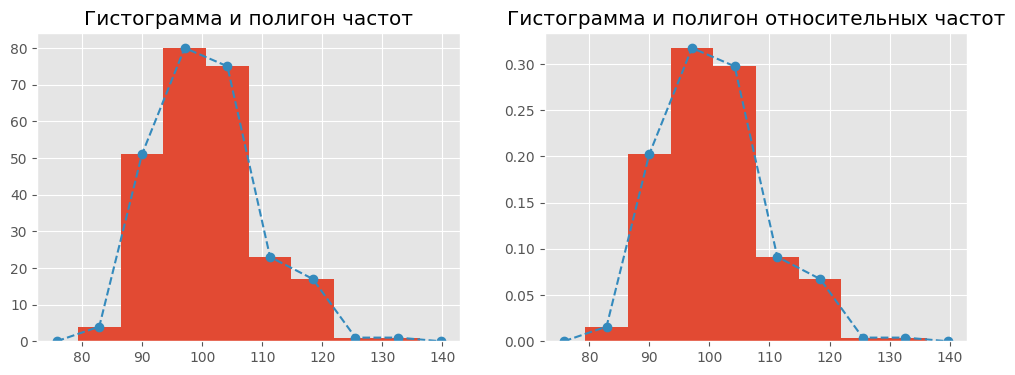

In [120]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax[0].set_title("Гистограмма и полигон частот")
ax[0].stairs(hist, edges=edges, fill=True)
ax[0].plot(np.concatenate(([edges[0] - bin_length], edges)) + bin_length / 2, np.concatenate(([0], hist, [0])), linestyle='--', marker='o')

ax[1].set_title("Гистограмма и полигон относительных частот")
ax[1].stairs(hist / n_1, edges=edges, fill=True)
_ = ax[1].plot(np.concatenate(([edges[0] - bin_length], edges)) + bin_length / 2, np.concatenate(([0], hist, [0])) / n_1, linestyle='--', marker='o')

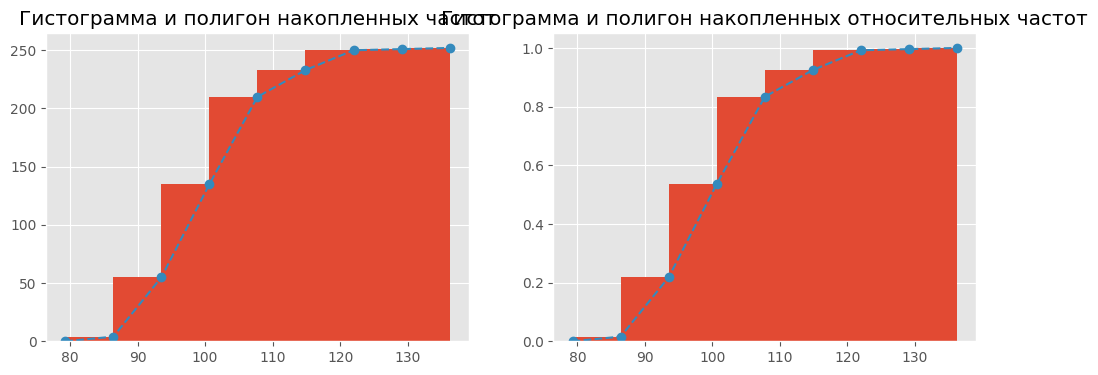

In [121]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

ax[0].set_title("Гистограмма и полигон накопленных частот")
ax[0].stairs(result.loc[:, "Накопл. частота"], edges=edges, fill=True)
ax[0].plot(edges, np.concatenate(([0], result.loc[:, "Накопл. частота"])), linestyle='--', marker='o')

ax[1].set_title("Гистограмма и полигон накопленных относительных частот")
ax[1].stairs(result.loc[:, "Накопл. частота"] / n_1, edges=edges, fill=True)
_ = ax[1].plot(edges, np.concatenate(([0], result.loc[:, "Накопл. частота"])) / n_1, linestyle='--', marker='o')

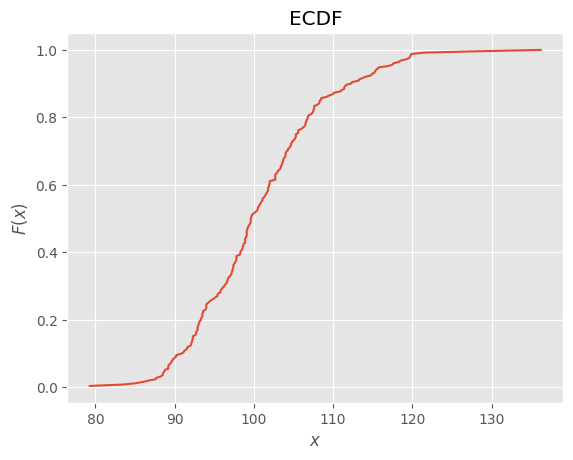

In [122]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(B10)
plt.plot(ecdf.x, ecdf.y)
plt.title("ECDF")
plt.ylabel(r"$F(x)$")
_ = plt.xlabel(r"$x$")

# Задание 2

In [123]:
S_1 = B10.std()
mean_1 = B10.mean() 
n_1 = B10.count()
S2_1 = B10.var()
alphas = [0.01, 0.05, 0.1]
res = pd.DataFrame(columns=alphas, index=["Нижняя граница", "Верхняя граница"])


доверительный интервал для $m$

In [124]:
t = stats.t(n_1 - 1)

for alpha in alphas:
    res.loc["Нижняя граница", alpha] = mean_1 - t.ppf(1 - alpha / 2) * S_1/math.sqrt(n_1)
    res.loc["Верхняя граница", alpha] = mean_1 + t.ppf(1 - alpha / 2) * S_1/math.sqrt(n_1)
    
res

,0.01,0.05,0.10
Нижняя граница,99.446,99.778,99.947
Верхняя граница,102.203,101.87,101.701


доверительный интервал для $\sigma^2$

In [125]:
chi2 = stats.chi2(n_1 - 1)

for alpha in alphas:
    res.loc["Нижняя граница", alpha] = (n_1 - 1)*S2_1/chi2.ppf(1 - alpha/2)
    res.loc["Верхняя граница", alpha] = (n_1 - 1)*S2_1/chi2.ppf(alpha/2)
    
res

,0.01,0.05,0.10
Нижняя граница,57.093,60.11,61.737
Верхняя граница,90.534,85.351,82.851


In [126]:
B11 = data.loc[:, "B11"]
mean_2 = B11.mean()
S2_2 = B11.var()
n_2 = B11.count()
n_2

252

доверительный интервал для $m_1 - m_2$

In [127]:
S_p = math.sqrt(((n_1 - 1) * S2_1 + (n_2 - 1) * S2_2)/(n_1 + n_2 - 2))

for alpha in alphas:
    t = stats.t(n_1 + n_2 - 2)
    F = max(S2_1, S2_2) / min(S2_1, S2_2)
    var1 =  S_p if F <= t.ppf(alpha/2) else S2_1
    var2 =  S_p if F <= t.ppf(alpha/2) else S2_2
    
    res.loc["Нижняя граница", alpha] = (mean_1 - mean_2) + t.ppf(alpha / 2) * math.sqrt(var1/n_1 + var2/n_2) 
    res.loc["Верхняя граница", alpha] = (mean_1 - mean_2) - t.ppf(alpha / 2) * math.sqrt(var1/n_1 + var2/n_2) 
    
res

,0.01,0.05,0.10
Нижняя граница,6.039,6.574,6.847
Верхняя граница,10.498,9.962,9.689


In [128]:
f = stats.f(n_2 - 1, n_1 - 1)

for alpha in alphas:
    res.loc["Нижняя граница", alpha] = S2_1/S2_2*f.ppf(alpha/2)
    res.loc["Верхняя граница", alpha] = S2_1/S2_2*f.ppf(1 - alpha/2)
    
res

,0.01,0.05,0.10
Нижняя граница,0.441,0.477,0.496
Верхняя граница,0.847,0.783,0.753


# Задание 3

## $H_0: m = m_0$

In [129]:
mean_1

100.82420634920635

In [130]:
print(stats.ttest_1samp(B10, 100.82))
print(stats.ttest_1samp(B10, 90))
print(stats.ttest_1samp(B10, -90))

TtestResult(statistic=0.007920516857234395, pvalue=0.9936866994893692, df=251)
TtestResult(statistic=20.381880973058774, pvalue=3.818187153637991e-55, df=251)
TtestResult(statistic=359.32022497641174, pvalue=0.0, df=251)


## $H_0: \sigma^2 = \sigma_0^2$

In [131]:
S2_1

71.07291769430215

In [132]:
def chi2test(x, sig0_squared):
    statistic = (x.size - 1) * np.var(x) / sig0_squared
    F = stats.chi2(x.size - 1).cdf(statistic)
    pvalue = 2 * min(1 - F, F)
    return pvalue, statistic

print(math.sqrt(71), chi2test(B10, 71))
print(math.sqrt(64), chi2test(B10, 64))
print(math.sqrt(49), chi2test(B10, 49))

8.426149773176359 (0.9973987901381749, 250.26072477412978)
8.0 (0.23856700816784393, 277.6329915463002)
7.0 (9.8985487899661e-06, 362.62268283598394)


## $H_0: m_1 = m_2$

In [133]:
print(f"m1 = {mean_1}, m2 = {mean_2}")

m1 = 100.82420634920635, m2 = 92.55595238095238


In [134]:
print(stats.ttest_ind(B10, B11, equal_var=False))

Ttest_indResult(statistic=9.58936696228363, pvalue=5.0414514491253886e-20)


## $H_0: \sigma_1 = \sigma_2$

In [135]:
print(f"B10.var(): {B10.var(ddof=0)}, B11.var(): {B11.var(ddof=0)}")

B10.var(): 70.79088230662634, B11.var(): 115.813337585034


In [136]:
Z = B10.var(ddof=0)/B11.var(ddof=0)
F = stats.f(n_1 - 1, n_2 - 2).cdf(Z)
pvalue = 2 * min(F, 1 - F)
print(f"pvalue: {pvalue}, stat: {Z}")

pvalue: 0.0001075403293077442, stat: 0.6112498247850713


# Задание 4

Тест хи квадрат

In [137]:
exp_distr = stats.norm(mean_1, S_1)

27.83559299840404 0.000235496972924909
[ 9.66256201 37.7030713  75.06295197 76.39608447 39.74982698 10.5542042
  1.42527431  0.0974817 ]


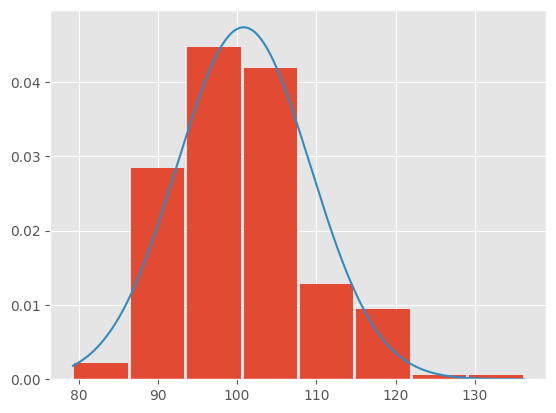

In [138]:
from dataclasses import dataclass

def freqs_from_cdf(cdf, size, bin_num, begin, end):
    bin_size = abs(end - begin) / bin_num
    freqs = np.array([], dtype=float)
    for x in np.linspace(begin, end, bin_num, endpoint=False):
        freqs = np.append(freqs, (cdf(x + bin_size) - cdf(x)) * size)
    return freqs

def merge_by_indices(hist, bins_to_merge):
    bins_to_merge_new = np.copy(bins_to_merge)
    new_hist = np.copy(hist)
    
    for indices in bins_to_merge_new:
        new_hist = np.insert(new_hist, indices[0], new_hist[indices[0]:indices[1]].sum())
        new_hist = np.delete(new_hist, range(indices[0] + 1, indices[1] + 1))
        bins_to_merge_new -= (indices[1] - indices[0]) - 1 
        
    return new_hist
    
def merge_lower_than_threshold(hist, threshold, max_merges=3):
    bins_to_merge = np.empty((0, 2), dtype=int)
    count = 0
    for i in range(hist.size):
        if hist[i] < threshold and count < max_merges:
            count += 1
        elif hist[i] >= count != 0:
            bins_to_merge = np.vstack((bins_to_merge, [i - count, i]))
            count = 0
    
    if count != 0:
        bins_to_merge = np.vstack((bins_to_merge, [hist.size - count, hist.size]))

    
    return merge_by_indices(hist, bins_to_merge), bins_to_merge

@dataclass
class ChisquareResult:
    stat: float
    pvalue: float
    hist1: np.ndarray
    hist2: np.ndarray

def chisquare(sample, exp_cdf, bin_num, ddof=0, merge_threshold=3, max_merges=4, begin=None, end=None):
    if begin is None:
        begin = sample.min()
    
    if end is None:
        end = sample.max()
    
    sample = sample[(sample >= begin) & (sample <= end)]
    
    samp_hist, _ = np.histogram(sample, bins=bin_num)
    samp_hist, bins_to_merge = merge_lower_than_threshold(samp_hist, merge_threshold, max_merges)
    
    exp_hist = freqs_from_cdf(exp_cdf, sample.size, bin_num, begin, end)
    exp_hist = merge_by_indices(exp_hist, bins_to_merge)
    
    stat = 0
    for i in range(exp_hist.size):
        stat += (samp_hist[i] - exp_hist[i])**2 / exp_hist[i]
    pvalue = 1 - stats.chi2(exp_hist.size - ddof - 1).cdf(stat)
    
    return ChisquareResult(stat, pvalue, samp_hist, exp_hist)

res = chisquare(B10, exp_distr.cdf, bin_num=bins, merge_threshold=0)
print(res.stat, res.pvalue)
print(res.hist2)

x = np.linspace(B10.min(), B10.max(), 500)
plt.hist(B10, bins=bins, density=True, rwidth=0.95)
plt.plot(x, exp_distr.pdf(x))

критерий Харке-Бера

In [139]:
stats.jarque_bera(B10)

SignificanceResult(statistic=28.636453835739097, pvalue=6.048853397994733e-07)

# Задание 5

критерий знаков

In [140]:
diff = B10 - B11
n = diff[diff != 0].size
stat = ((diff)[diff > 0].size - n / 2)  / (math.sqrt(n) / 2)
F = stats.norm(0, 1).pdf(stat)
pvalue = 2 * min(F, 1 - F)
print(stat, pvalue)

14.833068472798375 1.3342014548306503e-48


хи-квадрат

In [141]:
def chisquare_2samp(sample1 : np.ndarray, sample2 : np.ndarray, bins=10):
    edges = np.linspace(min(sample1.min(), sample2.min()), max(sample1.max(), sample2.max()), bins + 1)
    hist1, _ = np.histogram(sample1, bins=edges)
    hist2, _ = np.histogram(sample2, bins=edges)

    stat = 0 
    for i in range(hist1.size):
        stat += 1/(hist1[i] + hist2[i])*(hist1[i]/sample1.size - hist2[i]/sample2.size)**2
    
    stat *= sample1.size*sample2.size
    
    pvalue = 1 - stats.chi2(hist1.size - 1).cdf(stat)
    
    return stat, pvalue

print(chisquare_2samp(B10, B11, bins=bins))

(99.23702426032767, 0.0)


In [142]:
edges = np.linspace(min(B10.min(), B11.min()), max(B10.max(), B11.max()), bins + 1)
hist1, _ = np.histogram(B10, bins=edges)
hist2, _ = np.histogram(B11, bins=edges)
res = pd.DataFrame(columns=["Нижняя граница", "Верхняя граница", "Частота признака 1", "Частота признака 2", "Относит. частота признака 1", "Относит. частота признака 2"])
for i in range(hist1.size):
    left = edges[i]
    high = edges[i + 1]
    res.loc[i, :] = [left, high, hist1[i], hist2[i], hist1[i] / n_1, hist2[i] / n_2]

display(res)

,Нижняя граница,Верхняя граница,Частота признака 1,Частота признака 2,Относит. частота признака 1,Относит. частота признака 2
0,69.4,79.238,0,23,0.0,0.091
1,79.238,89.075,13,77,0.052,0.306
2,89.075,98.912,98,86,0.389,0.341
3,98.912,108.75,105,48,0.417,0.19
4,108.75,118.588,28,15,0.111,0.06
5,118.588,128.425,7,2,0.028,0.008
6,128.425,138.262,1,0,0.004,0.0
7,138.262,148.1,0,1,0.0,0.004


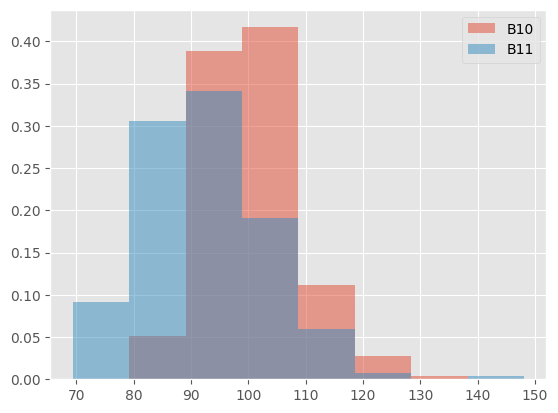

In [143]:
plt.stairs(hist1 / n_1, edges, label="B10", fill=True, alpha=0.5)
plt.stairs(hist2 / n_2, edges, label="B11", fill=True, alpha=0.5)
_ = plt.legend()

# Задание 6

In [144]:
group_names = data.B6.unique()
samp_freqs = np.asarray([data.loc[data.B6 == group_name].B3.value_counts().to_numpy() for group_name in group_names])
res = stats.contingency.chi2_contingency(samp_freqs, correction=False)

samp_table = pd.DataFrame(data=samp_freqs, index=[f"x{i}" for i in range(samp_freqs.shape[0])], columns=[f"y{i + 1}" for i in range(samp_freqs.shape[1])])
samp_table.loc["Total"] = samp_table.sum()
samp_table.loc[:, "Total"] = samp_table.sum(axis=1)

exp_table = pd.DataFrame(data=res.expected_freq, index=[f"x{i}" for i in range(res.expected_freq.shape[0])], columns=[f"y{i + 1}" for i in range(res.expected_freq.shape[1])])
exp_table.loc["Total"] = exp_table.sum()
exp_table.loc[:, "Total"] = exp_table.sum(axis=1)

display(samp_table, exp_table, res)

,y1,y2,y3,Total
x0,22,18,16,56
x1,39,26,8,73
x2,20,17,4,41
x3,39,32,11,82
Total,120,93,39,252


,y1,y2,y3,Total
x0,26.667,20.667,8.667,56.0
x1,34.762,26.940,11.298,73.0
x2,19.524,15.131,6.345,41.0
x3,39.048,30.262,12.690,82.0
Total,120.000,93.000,39.000,252.0


Chi2ContingencyResult(statistic=10.312314424310157, pvalue=0.1121010508845372, dof=6, expected_freq=array([[26.66666667, 20.66666667,  8.66666667],
       [34.76190476, 26.94047619, 11.29761905],
       [19.52380952, 15.13095238,  6.3452381 ],
       [39.04761905, 30.26190476, 12.69047619]]))

# Задание 7

In [145]:
pooled_mean = data.B7.mean()
groups = [data.loc[name == data.B6].B7.to_numpy() for name in group_names]

var_bg = 0
for sample in groups:
    var_bg += sample.size * (sample.mean() - pooled_mean)**2
var_bg /= data.B7.size

var_wg = 0
for sample in groups:
    var_wg += sample.size * sample.var()
var_wg /= data.B7.size

unbiased_var_bg = data.B7.size / (len(groups) - 1) * var_bg
unbiased_var_wg = data.B7.size / (data.B7.size - len(groups)) * var_wg
unbiased_var_pooled = np.var(data.B7, ddof=1)

print(f"\t\tvar_bg: {var_bg:.3f}, var_wg: {var_wg:.3f}, var_pooled: {data.B7.var(ddof=0):.3f}, var_bg + var_wg: {var_bg + var_wg:.3f}")
print(f"unbiased\tvar_bg: {unbiased_var_bg:.3f}, var_wg: {unbiased_var_wg:.3f}, var_pooled: {unbiased_var_pooled:.3f}, var_bg + var_wg: {unbiased_var_bg + unbiased_var_wg:.3f}")
print(f"det_coef^2: {var_bg/var_wg:.3f}, det_coef: {(var_bg/var_wg)**(1/2):.3f}")

		var_bg: 6.255, var_wg: 854.040, var_pooled: 860.295, var_bg + var_wg: 860.295
unbiased	var_bg: 525.399, var_wg: 867.815, var_pooled: 863.723, var_bg + var_wg: 1393.215
det_coef^2: 0.007, det_coef: 0.086


In [146]:
stats.f_oneway(*groups)

F_onewayResult(statistic=0.6054274553759238, pvalue=0.6120441527227956)

In [147]:
pd.DataFrame([[group_names[i], groups[i].size, groups[i].mean(), groups[i].var()] for i in range(len(group_names))], \
    columns=['group name', 'size', 'mean', 'var'])

,group name,size,mean,var
0,Somerville,56,180.083,1551.534
1,Arlington,73,175.038,336.167
2,Norwood,41,181.083,687.370
3,Revere,82,180.514,922.072


# Задание 8

## 8.1

In [148]:
rho = stats.pearsonr(B10, B11)
r = stats.spearmanr(B10, B11)
tau = stats.kendalltau(B10, B11)
n = B10.size

print(f'pearsonr: {rho},\n spearmanr: {r},\n kendalltau: {tau}')

pearsonr: PearsonRResult(statistic=0.915827669854678, pvalue=4.7986071277866056e-101),
 spearmanr: SignificanceResult(statistic=0.8952563412689127, pvalue=9.432456663616328e-90),
 kendalltau: SignificanceResult(statistic=0.7243113600801906, pvalue=2.2625919542765998e-65)


In [149]:
print(f'{rho.confidence_interval(1 - 0.01)[0]:.6f}, {rho.confidence_interval(1 - 0.01)[1]:.6f}')
print(f'{rho.confidence_interval(1 - 0.05)[0]:.6f}, {rho.confidence_interval(1 - 0.05)[1]:.6f}')
print(f'{rho.confidence_interval(1 - 0.1)[0]:.6f}, {rho.confidence_interval(1 - 0.1)[1]:.6f}')

0.885197, 0.938552
0.893357, 0.933729
0.897318, 0.931122


In [150]:
stat = rho[0] * math.sqrt(n - 2) / math.sqrt(1 - rho[0]**2)
F = stats.t(n - 2).cdf(stat)
pvalue = 2 * min(F, 1 - F)
print(stat, pvalue)

36.05959705174222 0.0


In [151]:
stat = r[0] * math.sqrt(n - 2) / math.sqrt(1 - r[0]**2)
F = stats.t(n - 2).cdf(stat)
pvalue = 2 * min(F, 1 - F)
print(stat, pvalue)

31.77017163599281 0.0


In [152]:
stat = tau[0] * math.sqrt((9*n*(n+1))/2*(2*n+5))
F = stats.norm(0, 1).cdf(stat)
pvalue = 2 * min(F, 1 - F)
print(stat, pvalue)

8752.880026655592 0.0


## 8.2

In [153]:
samp_names = ['B10', 'B11', 'B12']
samples = [data[samp_name].to_numpy() for samp_name in samp_names]

In [154]:
kendall_coeffs = [[stats.kendalltau(samp1, samp2).statistic for samp2 in samples] for samp1 in samples]
pd.DataFrame(kendall_coeffs, columns=samp_names, index=samp_names)

,B10,B11,B12
B10,1.000,0.724,0.624
B11,0.724,1.000,0.662
B12,0.624,0.662,1.000


In [155]:
kendall_coeffs = [[stats.kendalltau(samp1, samp2).pvalue for samp2 in samples] for samp1 in samples]
pd.DataFrame(kendall_coeffs, columns=samp_names, index=samp_names)

,B10,B11,B12
B10,8.839e-123,2.263e-65,6.355e-49
B11,2.263e-65,5.562e-123,8.527e-55
B12,6.355e-49,8.527e-55,1.812e-122


In [156]:
sums = np.sum(stats.rankdata(samples, axis=1), axis=0)
n = len(samples[0])
k = len(samples) - 1
S = sums.var() * n
W = (12*S)/((k + 1)**2 * (n**3 - n))
Z = 12*S/(k + 1) * n * (n - 1)
pvalue = 1 - stats.chi2(n - 1).cdf(Z)
print("%.3f %.3e %.3f" % (W, Z, pvalue))

0.900 2.734e+12 0.000


# Задание 9

In [157]:
def lin_regr(funcs, X, Y):
    F = call_funcs(funcs, X).T
    y = np.asmatrix(Y).T
    return np.asarray(((F.T * F).I * F.T * y).T).flatten()

def reg_var(func, y):
    y_mean = np.mean(y)
    return np.sum((func - y_mean)**2)/len(y)

def res_var(func, y):
    return np.sum((y - func)**2)/len(y)

def call_funcs(funcs, x):
    return np.asmatrix(np.asarray([[funcs[i](x)] for i in range(len(funcs))]).reshape((len(funcs), -1)))

def func(funcs, b, x):
    return np.asarray((call_funcs(funcs, x).T * np.asmatrix(b).T).T).flatten()

def display_coefs(funcs, X, Y, b):
    n = len(X)
    k = len(b)
    reg_var_val = reg_var(func(funcs, b, X), Y)
    res_var_val = res_var(func(funcs, b, X), Y)
    var_val = Y.var()
    coef_det = reg_var_val / var_val
    display(pd.DataFrame\
    (\
        columns=['Показатель вариации', 'Число степеней свободы', 'Несмещенная оценка'],\
        index=['Факторный признак', 'Остаточные признаки', 'Все признаки'],\
        data=[[reg_var_val, k - 1, reg_var_val * n / (k - 1)],\
            [res_var_val, n - k, res_var_val * n / (n - k)],\
            [var_val, n - 1, reg_var_val * n / (n - 1)]]\
    ))
    print(f'reg_var + res_var: {reg_var_val + res_var_val:.3f}, coef_det: {coef_det:.3f}, sqrt(coef_det): {(coef_det)**0.5:.3f}')
    
def b_significance(func, k, Y):
    n = len(Y)
    stat = reg_var(func, Y) / (k - 1) / (res_var(func, Y) / (n - k))
    pvalue = 1 - stats.f(k - 1, n - k).cdf(stat) 
    return stat, pvalue
    

def conf_int_func(funcs, X, Y, b, alpha, x):
    F = call_funcs(funcs, X).T
    n = F.shape[0]
    k = F.shape[1]
    t = stats.t(n - k).ppf(1 - alpha/2)
    A = np.asarray([(call_funcs(funcs, x_i).T * (F.T * F).I * call_funcs(funcs, x_i))[0, 0] for x_i in x])
    delta = t * (n / (n - k) * res_var(func(funcs, b, X), Y) * A)**0.5
    return func(funcs, b, x) - delta, func(funcs, b, x) + delta

def conf_int_b(funcs, X, Y, b, alpha):
    intervals = np.ndarray((len(b), 2))
    F = call_funcs(funcs, X).T
    C = (F.T * F).I
    for i in range(len(b)):
        t = stats.t(n - k).ppf(1 - alpha/2)
        delta = t * (res_var(func(funcs, b, X), Y) * n / (n - k) * C[i, i])**0.5
        intervals[i][0] = b[i] - delta
        intervals[i][1] = b[i] + delta
    return intervals

In [158]:
X = data.B7.to_numpy().flatten()
Y = data.B2.to_numpy().flatten()
indecies_to_delete = np.bitwise_or(X > 300, Y > 39).nonzero()
X = np.delete(X, indecies_to_delete)
Y = np.delete(Y, indecies_to_delete)

## 9.1

b: [-13.96155415   0.18457899]


,Показатель вариации,Число степеней свободы,Несмещенная оценка
Факторный признак,24.746,1,6161.757
Остаточные признаки,39.759,247,40.081
Все признаки,64.505,248,24.846


reg_var + res_var: 64.505, coef_det: 0.384, sqrt(coef_det): 0.619
significance test: (153.73334749750725, 1.1102230246251565e-16)
confidence intervals (alpha = 0.01): [[-20.91654506  -7.00656324]
 [  0.14594039   0.22321758]]
confidence intervals (alpha = 0.05): [[-19.23880983  -8.68429848]
 [  0.15526108   0.21389689]]
confidence intervals (alpha = 0.1): [[-18.38531946  -9.53778884]
 [  0.16000267   0.20915531]]


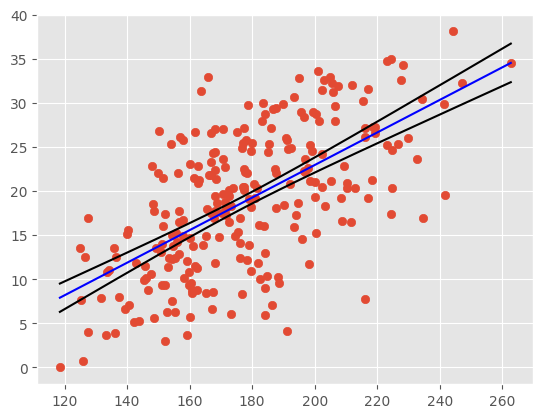

In [159]:
funcs = [lambda x: np.ones_like(x), lambda x: x]
b = lin_regr(funcs, X, Y)
print('b:', b)

display_coefs(funcs, X, Y, b)

x = np.linspace(X.min(), X.max(), 1000)
plt.scatter(X, Y)
plt.plot(x, func(funcs, b, x), color='blue')

low, high = conf_int_func(funcs, X, Y, b, 0.1, x)
plt.plot(x, low, color='black')
plt.plot(x, high, color='black')
print("significance test:", b_significance(func(funcs, b, X), len(b), Y))
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
    print(f"confidence intervals (alpha = {alpha}):", conf_int_b(funcs, X, Y, b, alpha))

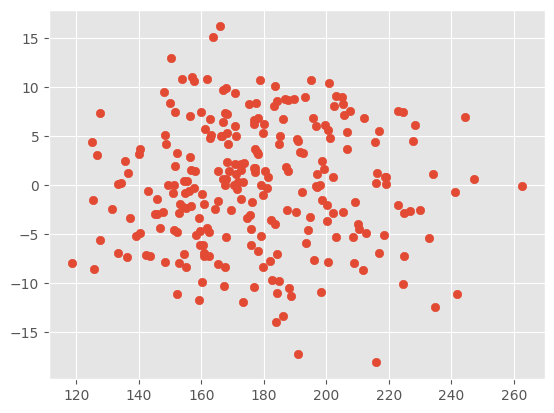

In [160]:
plt.scatter(X, Y - func(funcs, b, X))

## 9.2

b: [-3.82471344e+01  4.56098675e-01 -7.41884107e-04]


,Показатель вариации,Число степеней свободы,Несмещенная оценка
Факторный признак,25.233,2,3141.524
Остаточные признаки,39.272,246,39.751
Все признаки,64.505,248,25.335


reg_var + res_var: 64.505, coef_det: 0.391, sqrt(coef_det): 0.625
significance test (79.03067183759923, 1.1102230246251565e-16)


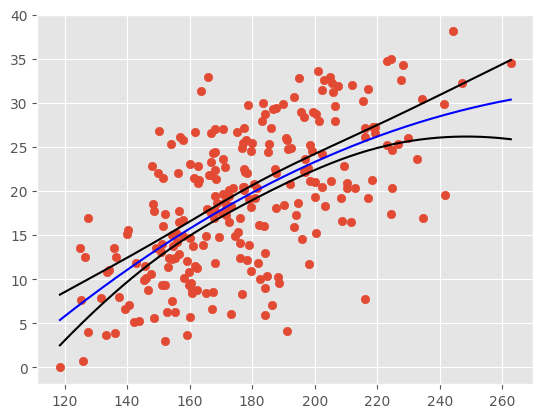

In [161]:
funcs = [lambda x: np.ones_like(x), lambda x: x, lambda x: x**2]
b = lin_regr(funcs, X, Y)
print('b:', b)

display_coefs(funcs, X, Y, b)

x = np.linspace(X.min(), X.max(), 1000)
plt.scatter(X, Y)
plt.plot(x, func(funcs, b, x), color='blue')

low, high = conf_int_func(funcs, X, Y, b, 0.1, x)
plt.plot(x, low, color='black')
plt.plot(x, high, color='black')

print("significance test", b_significance(func(funcs, b, X), len(b), Y))

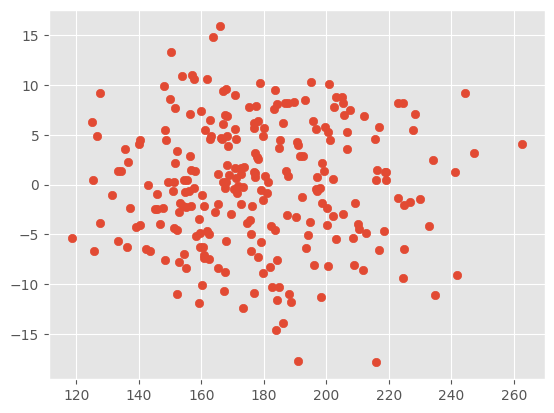

In [162]:
plt.scatter(X, Y - func(funcs, b, X))

## 9.3

b: [-24.1263335    0.19218454   0.19981379]


,Показатель вариации,Число степеней свободы,Несмещенная оценка
Факторный признак,32.802,2,4116.678
Остаточные признаки,36.203,248,36.641
Все признаки,69.006,250,32.933


reg_var + res_var: 69.006, coef_det: 0.475, sqrt(coef_det): 0.689


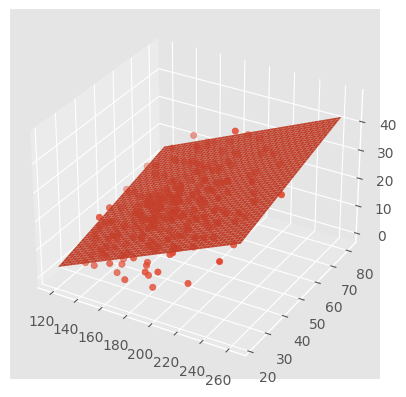

In [163]:
X = np.column_stack((data.B7, data.B4))
Y = data.B2
indecies_to_delete = (X[:, 0] > 300).nonzero()
X = np.delete(X, indecies_to_delete, axis=0)
Y = np.delete(Y, indecies_to_delete, axis=0)

funcs = [lambda x: np.ones_like(x[:, 0]), lambda x: x[:, 0], lambda x: x[:, 1]]
b = lin_regr(funcs, X, Y)
print('b:', b)

display_coefs(funcs, X, Y, b)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
x = np.linspace(X[:, 0].min(), X[:, 0].max(), 1000)
y = np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
xs, ys = np.meshgrid(x, y)
ax.plot_surface(xs, ys, b[0] + b[1]*xs + b[2]*ys)

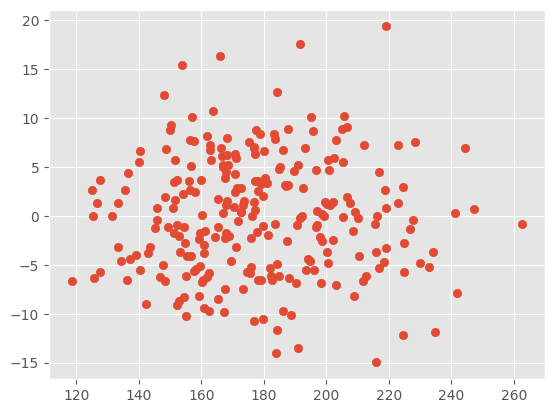

In [164]:
plt.scatter(X[:, 0], Y - func(funcs, b, X))

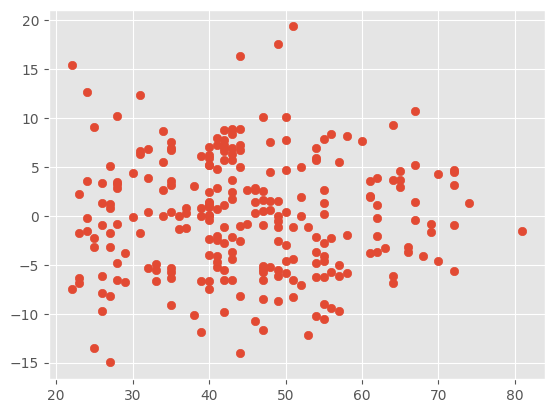

In [165]:
plt.scatter(X[:, 1], Y - func(funcs, b, X))